<a href="https://colab.research.google.com/github/CKLee19800303/DREAMPlace_on_Colab/blob/master/DREAMPlace_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To confirm we're using GPU runtime

In [0]:
!nvidia-smi

In [0]:
import time

Download Boost and CMake (It takes about 30 seconds)

In [0]:
!wget -O boost_1_62_0.tar.gz https://sourceforge.net/projects/boost/files/boost/1.62.0/boost_1_62_0.tar.gz/download
!wget https://github.com/Kitware/CMake/releases/download/v3.15.0-rc3/cmake-3.15.0-rc3.tar.gz
!tar -zxf boost_1_62_0.tar.gz
!tar -zxf cmake-3.15.0-rc3.tar.gz

Install Boost (This cell takes about 15 min)

In [0]:
start_t = time.time()
%cd boost_1_62_0
!./bootstrap.sh
!./b2 -j           
!sudo ./b2 install
end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

Compile Boost (This cell takes about 10 min)

In [0]:
start_t = time.time()
%cd ../cmake-3.15.0-rc3
!./bootstrap
!make -j $(nproc)
!make install
end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

Git clone DREAMPlace

In [55]:
start_t = time.time()
%cd /content/
!git submodule init
!git submodule update
!git clone --recursive https://github.com/limbo018/DREAMPlace.git
end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: destination path 'DREAMPlace' already exists and is not an empty directory.
The Cell run time is : 5.793 seconds


Check gcc version

In [56]:
!gcc --version

gcc (Ubuntu 7.4.0-1ubuntu1~18.04.1) 7.4.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Install some other packages

In [0]:
start_t = time.time()
!apt-get update
!apt-get install bison
!apt-get install flex
!apt-get install doxygen
!apt-get install lpsolve
!apt-get install liblpsolve55-dev
!apt-get install ghostscript
!apt-get install texlive-bibtex-extra biber
!apt-get install libcairo2-dev
end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

PIP Install DREAMPlace requirements 

In [58]:
start_t = time.time()
%cd /content/DREAMPlace/
!pip install -r requirements.txt 
end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

/content/DREAMPlace
The Cell run time is : 3.392 seconds


Compile some other files (This takes about 30 min)

In [0]:
start_t = time.time()

%cd /content/DREAMPlace/
!mkdir build 
%cd build 
!cmake .. -DCMAKE_INSTALL_PREFIX=/content/DREAMPlace/
!make 
!make install

end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

Remove temp files in build folder

In [62]:
%cd /content/DREAMPlace/
!rm -rf build/

/content/DREAMPlace


Download ispd 2005 & 2015 dataset

In [63]:
start_t = time.time()

!python /content/DREAMPlace/benchmarks/ispd2005_2015.py

end_t = time.time()
print("The Cell run time is : %.03f seconds" %(end_t-start_t))

Download from http://www.cerc.utexas.edu/~zixuan/ispd2005.tar.xz to /content/DREAMPlace/benchmarks/ispd2005.tar.xz
Uncompress /content/DREAMPlace/benchmarks/ispd2005.tar.xz to /content/DREAMPlace/benchmarks
remove downloaded file /content/DREAMPlace/benchmarks/ispd2005.tar.xz
Download from http://www.cerc.utexas.edu/~zixuan/ispd2005dp.tar.xz to /content/DREAMPlace/benchmarks/ispd2005dp.tar.xz
Uncompress /content/DREAMPlace/benchmarks/ispd2005dp.tar.xz to /content/DREAMPlace/benchmarks
remove downloaded file /content/DREAMPlace/benchmarks/ispd2005dp.tar.xz
Download from http://www.cerc.utexas.edu/~zixuan/ispd2015dp.tar.xz to /content/DREAMPlace/benchmarks/ispd2015dp.tar.xz
Uncompress /content/DREAMPlace/benchmarks/ispd2015dp.tar.xz to /content/DREAMPlace/benchmarks
remove downloaded file /content/DREAMPlace/benchmarks/ispd2015dp.tar.xz


Run Placer

In [0]:
%cd /content/DREAMPlace/
!python /content/DREAMPlace/dreamplace/Placer.py /content/DREAMPlace/test/ispd2005/adaptec1.json

**I found the error message of** 
NameError: name 'weighted_average_wirelength_cuda_merged' is not defined

**It's due to**
ImportError on "weighted_average_wirelength_cuda_sparse"


**This error lets the file** weighted_average_wirelength.py **ignore** import
dreamplace.ops.weighted_average_wirelength.weighted_average_wirelength_cuda_*merged*

**Hence I modify the** weighted_average_wirelength.py **from**
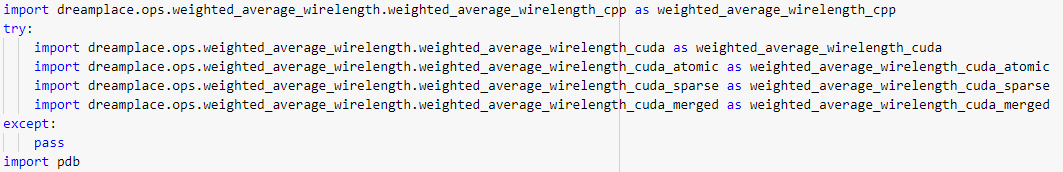


**as**
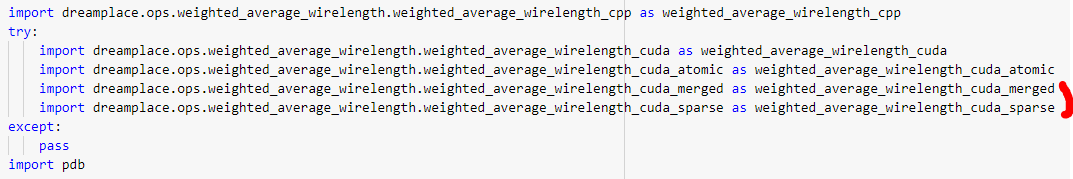

Debug Part

In [68]:
import torch
import dreamplace.ops.weighted_average_wirelength.weighted_average_wirelength_cpp as weighted_average_wirelength_cpp    
import dreamplace.ops.weighted_average_wirelength.weighted_average_wirelength_cuda as weighted_average_wirelength_cuda
import dreamplace.ops.weighted_average_wirelength.weighted_average_wirelength_cuda_atomic as weighted_average_wirelength_cuda_atomic
import dreamplace.ops.weighted_average_wirelength.weighted_average_wirelength_cuda_sparse as weighted_average_wirelength_cuda_sparse
import dreamplace.ops.weighted_average_wirelength.weighted_average_wirelength_cuda_merged as weighted_average_wirelength_cuda_merged

ImportError: ignored